In [1]:
from sklearn import datasets
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

## Leemos los datos y lo distribuimos en nuestras variables X e Y

In [2]:
data = datasets.load_digits()

In [3]:
#Normalizando datos
X = data.images

Y = data.target

print(X.shape)
print(Y.shape)

(1797, 8, 8)
(1797,)


(8, 8)


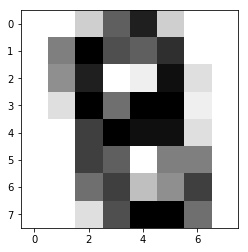

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [4]:
m = X.shape[0]

print(X[0].shape)
plt.imshow(X[500], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print(X[0])

## Vamos a necesitar "Aplanar" las imágenes

In [5]:
print(m)
X_flattened = X.reshape((m, -1))

1797


In [6]:
X_flattened.shape

(1797, 64)

In [7]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_flattened, Y, test_size=0.20, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


## Usaremos un SVC basado en una SVM

In [8]:
model = svm.SVC(gamma=0.001)

In [9]:
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
model.score(X_test, Y_test)

0.9944444444444445

## Métricas
$$Precision = \frac{TP}{TP+FP}$$
Cantidad de ítems clasificados relevantes
$$Recall = \frac{TP}{FN+TP}$$
Cantidad de ítems relevantes fueron clasificados correctamente
$$2*\frac{presicion*recall}{precision+recall}$$
La métrica F1 provee una medida de la exactitud del test

In [11]:
print(metrics.classification_report(Y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        35
          2       1.00      1.00      1.00        36
          3       1.00      1.00      1.00        41
          4       1.00      1.00      1.00        38
          5       1.00      1.00      1.00        30
          6       1.00      1.00      1.00        37
          7       1.00      0.97      0.99        37
          8       1.00      0.97      0.98        29
          9       0.94      1.00      0.97        34

avg / total       0.99      0.99      0.99       360



In [12]:
print(metrics.confusion_matrix(Y_test, model.predict(X_test)))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  0  0  0  0 34]]


# Pruebas

In [13]:
import cv2

(400, 400)


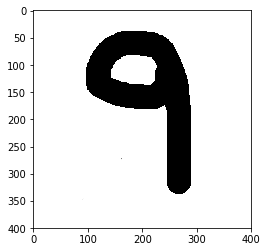

In [22]:
test_digit = cv2.imread('test_digit_9.png')[:,:,0]
print(test_digit.shape)
plt.imshow(test_digit, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [23]:
test_digit = cv2.resize(test_digit, (8,8), interpolation=cv2.INTER_AREA)

(8, 8)


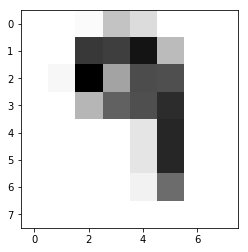

[[  0   0   3  41  24   0   0   0]
 [  0   0 134 131 159  46   0   0]
 [  0   6 173  62 121 119   0   0]
 [  0   0  50 107 119 143   0   0]
 [  0   0   0   0  18 147   0   0]
 [  0   0   0   0  18 147   0   0]
 [  0   0   0   0   9 100   0   0]
 [  0   0   0   0   0   0   0   0]]


In [24]:
print(test_digit.shape)
plt.imshow(test_digit, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
print(test_digit)

In [25]:
test_digit_flatten = test_digit.flatten().reshape((1,64))
print(test_digit_flatten.shape)
print(model.predict(test_digit_flatten))

(1, 64)
[1]
